In [ ]:
# Essential libraries
import numpy as np 
import pandas as pd
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras import optimizers,utils,regularizers
from keras.models import Sequential, Model, load_model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D, Input
from keras.layers import Conv2D, Activation,MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SoP/train2.csv')

In [ ]:
df

,Age,Sex,Group,Duration_(sec),MLU_Utts,MLU_Morphemes,FREQ_TTR,Words_Min,Verbs_Utt,%_Word_Errors,Utt_Errors,density,%_Nouns,%_Plurals,%_Verbs,%_Aux,%_Mod,%_3S,%_13S,%_PAST,%_PASTP,%_PRESP,%_prep,%_adj,%_adv,%_conj,%_det,%_pro,noun_verb,retracing,repetition,mor_Utts,mor_syllables,syllables_min,%_Prolongation,Mean_RU,%_Phonological_fragment,%_Phrase_repetitions,%_Word_revisions,%_Phrase_revisions,%_Pauses,%_Filled_pauses,%_TD,SLD_Ratio,Content_words_ratio,Function_words_ratio,N,V,Q,S
0,58.0,0,Control,56,16,9.250,0.523,141.429,1.563,0.000,1,0.371,25.000,21.212,18.939,5.303,0.758,52.000,0.000,0.000,8.000,24.000,9.848,6.061,6.061,0.000,15.909,5.303,1.320,1,2,18.0,176.0,178.983,0.000,1.0,0.0,0.568,0.000,0.568,0.000,0.0,1.136,0.333000,0.00,0.014,19.000000,19.000000,8.000000,15.000000
1,59.0,0,Control,65,14,7.714,0.490,94.154,1.067,0.000,2,0.353,29.412,20.000,15.686,7.843,0.000,68.750,0.000,0.000,0.000,50.000,3.922,6.863,3.922,0.000,14.706,6.863,1.875,1,0,15.0,131.0,120.923,0.000,0.0,0.0,0.000,0.000,0.763,0.000,0.0,0.763,0.000000,0.00,0.000,17.000000,16.000000,8.000000,16.000000
2,60.0,0,Control,62,14,12.071,0.469,140.323,1.571,0.000,1,0.400,21.379,29.032,15.862,6.207,0.690,60.870,0.000,0.000,4.348,30.435,9.655,6.207,8.276,2.759,14.483,6.897,1.348,0,1,16.0,195.0,172.059,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,1.000000,0.00,0.012,16.815287,17.732484,9.866242,14.993631
3,61.0,0,Control,89,11,17.091,0.503,111.236,2.818,0.000,0,0.491,19.394,12.500,21.818,3.636,1.212,16.667,19.444,47.222,13.889,25.000,4.242,4.242,7.273,1.818,12.727,9.697,0.889,2,1,12.0,217.0,143.077,0.000,0.0,0.0,0.461,0.922,0.000,0.000,0.0,1.382,0.000000,0.00,0.000,18.000000,28.000000,14.000000,22.000000
4,72.0,1,Control,34,13,7.846,0.568,155.294,1.000,1.136,1,0.386,26.136,17.391,15.909,10.227,0.000,100.000,0.000,0.000,7.143,57.143,7.955,3.409,4.545,1.136,15.909,6.818,1.643,1,0,14.0,113.0,183.243,0.885,0.0,0.0,0.000,0.885,0.000,0.000,0.0,0.885,0.500000,0.00,0.000,18.000000,18.000000,8.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,65.0,0,ProbableAD,22,6,6.833,0.811,100.909,0.667,0.000,0,0.351,32.432,25.000,10.811,5.405,0.000,25.000,50.000,50.000,25.000,0.000,18.919,8.108,0.000,0.000,16.216,8.108,3.000,0,0,9.0,68.0,120.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.223544,0.00,0.000,15.000000,16.000000,9.000000,10.000000
1263,73.0,0,ProbableAD,21,7,6.714,0.744,122.857,1.000,0.000,0,0.349,18.605,12.500,18.605,2.326,4.651,12.500,0.000,0.000,0.000,25.000,9.302,4.651,2.326,2.326,18.605,6.977,1.000,0,0,24.0,179.0,108.485,0.000,0.0,0.0,0.000,0.559,0.559,0.559,0.0,1.676,0.000000,0.00,0.000,17.000000,26.000000,9.000000,15.000000
1264,71.0,0,ProbableAD,48,6,6.000,0.694,45.000,1.500,0.000,0,0.333,27.778,0.000,25.000,0.000,0.000,44.444,0.000,11.111,0.000,0.000,2.778,2.778,2.778,0.000,16.667,8.333,1.111,0,1,16.0,86.0,55.484,0.000,1.0,0.0,0.000,0.000,0.000,2.326,0.0,2.326,0.500000,0.04,0.000,14.000000,13.000000,13.000000,15.000000
1265,74.0,0,PossibleAD,26,6,8.667,0.717,106.154,1.167,0.000,0,0.391,28.261,23.077,15.217,2.174,0.000,28.571,0.000,28.571,0.000,14.286,13.043,4.348,4.348,0.000,19.565,6.522,1.857,1,0,7.0,60.0,124.138,1.667,0.0,0.0,0.000,0.000,1.667,1.667,0.0,3.333,0.333000,0.00,0.000,17.000000,14.000000,4.000000,13.000000


In [ ]:
print(df['Group'].value_counts())

ProbableAD    762
Control       243
MCI           162
PossibleAD     68
Vascular       20
Memory         12
Name: Group, dtype: int64


In [ ]:
df['Group'] = df['Group'].replace('Control',0)
df['Group'] = df['Group'].replace('MCI',1)
df['Group'] = df['Group'].replace('Memory',2)
df['Group'] = df['Group'].replace('Vascular',3)
df['Group'] = df['Group'].replace('PossibleAD',4)
df['Group'] = df['Group'].replace('ProbableAD',5)


In [ ]:
df

,Age,Sex,Group,Duration_(sec),MLU_Utts,MLU_Morphemes,FREQ_TTR,Words_Min,Verbs_Utt,%_Word_Errors,Utt_Errors,density,%_Nouns,%_Plurals,%_Verbs,%_Aux,%_Mod,%_3S,%_13S,%_PAST,%_PASTP,%_PRESP,%_prep,%_adj,%_adv,%_conj,%_det,%_pro,noun_verb,retracing,repetition,mor_Utts,mor_syllables,syllables_min,%_Prolongation,Mean_RU,%_Phonological_fragment,%_Phrase_repetitions,%_Word_revisions,%_Phrase_revisions,%_Pauses,%_Filled_pauses,%_TD,SLD_Ratio,Content_words_ratio,Function_words_ratio,N,V,Q,S
0,58.0,0,0,56,16,9.250,0.523,141.429,1.563,0.000,1,0.371,25.000,21.212,18.939,5.303,0.758,52.000,0.000,0.000,8.000,24.000,9.848,6.061,6.061,0.000,15.909,5.303,1.320,1,2,18.0,176.0,178.983,0.000,1.0,0.0,0.568,0.000,0.568,0.000,0.0,1.136,0.333000,0.00,0.014,19.000000,19.000000,8.000000,15.000000
1,59.0,0,0,65,14,7.714,0.490,94.154,1.067,0.000,2,0.353,29.412,20.000,15.686,7.843,0.000,68.750,0.000,0.000,0.000,50.000,3.922,6.863,3.922,0.000,14.706,6.863,1.875,1,0,15.0,131.0,120.923,0.000,0.0,0.0,0.000,0.000,0.763,0.000,0.0,0.763,0.000000,0.00,0.000,17.000000,16.000000,8.000000,16.000000
2,60.0,0,0,62,14,12.071,0.469,140.323,1.571,0.000,1,0.400,21.379,29.032,15.862,6.207,0.690,60.870,0.000,0.000,4.348,30.435,9.655,6.207,8.276,2.759,14.483,6.897,1.348,0,1,16.0,195.0,172.059,0.000,1.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,1.000000,0.00,0.012,16.815287,17.732484,9.866242,14.993631
3,61.0,0,0,89,11,17.091,0.503,111.236,2.818,0.000,0,0.491,19.394,12.500,21.818,3.636,1.212,16.667,19.444,47.222,13.889,25.000,4.242,4.242,7.273,1.818,12.727,9.697,0.889,2,1,12.0,217.0,143.077,0.000,0.0,0.0,0.461,0.922,0.000,0.000,0.0,1.382,0.000000,0.00,0.000,18.000000,28.000000,14.000000,22.000000
4,72.0,1,0,34,13,7.846,0.568,155.294,1.000,1.136,1,0.386,26.136,17.391,15.909,10.227,0.000,100.000,0.000,0.000,7.143,57.143,7.955,3.409,4.545,1.136,15.909,6.818,1.643,1,0,14.0,113.0,183.243,0.885,0.0,0.0,0.000,0.885,0.000,0.000,0.0,0.885,0.500000,0.00,0.000,18.000000,18.000000,8.000000,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,65.0,0,5,22,6,6.833,0.811,100.909,0.667,0.000,0,0.351,32.432,25.000,10.811,5.405,0.000,25.000,50.000,50.000,25.000,0.000,18.919,8.108,0.000,0.000,16.216,8.108,3.000,0,0,9.0,68.0,120.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.223544,0.00,0.000,15.000000,16.000000,9.000000,10.000000
1263,73.0,0,5,21,7,6.714,0.744,122.857,1.000,0.000,0,0.349,18.605,12.500,18.605,2.326,4.651,12.500,0.000,0.000,0.000,25.000,9.302,4.651,2.326,2.326,18.605,6.977,1.000,0,0,24.0,179.0,108.485,0.000,0.0,0.0,0.000,0.559,0.559,0.559,0.0,1.676,0.000000,0.00,0.000,17.000000,26.000000,9.000000,15.000000
1264,71.0,0,5,48,6,6.000,0.694,45.000,1.500,0.000,0,0.333,27.778,0.000,25.000,0.000,0.000,44.444,0.000,11.111,0.000,0.000,2.778,2.778,2.778,0.000,16.667,8.333,1.111,0,1,16.0,86.0,55.484,0.000,1.0,0.0,0.000,0.000,0.000,2.326,0.0,2.326,0.500000,0.04,0.000,14.000000,13.000000,13.000000,15.000000
1265,74.0,0,4,26,6,8.667,0.717,106.154,1.167,0.000,0,0.391,28.261,23.077,15.217,2.174,0.000,28.571,0.000,28.571,0.000,14.286,13.043,4.348,4.348,0.000,19.565,6.522,1.857,1,0,7.0,60.0,124.138,1.667,0.0,0.0,0.000,0.000,1.667,1.667,0.0,3.333,0.333000,0.00,0.000,17.000000,14.000000,4.000000,13.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1267 non-null   float64
 1   Sex                      1267 non-null   int64  
 2   Group                    1267 non-null   int64  
 3   Duration_(sec)           1267 non-null   int64  
 4   MLU_Utts                 1267 non-null   int64  
 5   MLU_Morphemes            1267 non-null   float64
 6   FREQ_TTR                 1267 non-null   float64
 7   Words_Min                1267 non-null   float64
 8   Verbs_Utt                1267 non-null   float64
 9   %_Word_Errors            1267 non-null   float64
 10  Utt_Errors               1267 non-null   int64  
 11  density                  1267 non-null   float64
 12  %_Nouns                  1267 non-null   float64
 13  %_Plurals                1267 non-null   float64
 14  %_Verbs                 

In [ ]:
y = df['Group']
x = df.drop(['Group'],axis = 1) 

In [ ]:
from sklearn.model_selection import train_test_split
x1, x_test, y1, y_test = train_test_split(x, y, test_size=0.15)
x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.22)

In [ ]:
print(x_train['Age'].size)
print(x_val['Age'].size)
print(x_test['Age'].size)

839
237
191


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(units = 64, activation = 'relu', input_dim = 49))
model.add(BatchNormalization())

model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(units = 64, activation = 'relu'))
model.add(BatchNormalization())

model.add(Dense(units = 6, activation = 'softmax'))

In [ ]:
opt = optimizers.Adam(lr=0.004)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=70, validation_data=(x_val,y_val))

Epoch 1/70
29/29 [==============================] - 0s 15ms/step - loss: 10.7014 - accuracy: 0.3873 - val_loss: 9.6418 - val_accuracy: 0.6852
Epoch 2/70
29/29 [==============================] - 0s 7ms/step - loss: 8.6621 - accuracy: 0.6729 - val_loss: 7.6030 - val_accuracy: 0.6481
Epoch 3/70
29/29 [==============================] - 0s 6ms/step - loss: 6.5720 - accuracy: 0.7035 - val_loss: 5.7133 - val_accuracy: 0.6420
Epoch 4/70
29/29 [==============================] - 0s 7ms/step - loss: 4.8080 - accuracy: 0.7374 - val_loss: 4.3256 - val_accuracy: 0.6111
Epoch 5/70
29/29 [==============================] - 0s 7ms/step - loss: 3.5673 - accuracy: 0.7341 - val_loss: 3.4210 - val_accuracy: 0.5988
Epoch 6/70
29/29 [==============================] - 0s 7ms/step - loss: 2.7597 - accuracy: 0.7407 - val_loss: 2.6747 - val_accuracy: 0.6111
Epoch 7/70
29/29 [==============================] - 0s 7ms/step - loss: 2.2244 - accuracy: 0.7363 - val_loss: 2.1912 - val_accuracy: 0.6173
Epoch 8/70
29/29 [

In [ ]:
print(model.metrics_names)

['loss', 'accuracy']


In [ ]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 1.7053 - accuracy: 0.7068


[1.7052698135375977, 0.7068063020706177]

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(units = 64, activation = 'relu', input_dim = 49))
  model.add(BatchNormalization())

  model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())

  model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 256, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 128, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.3))
  model.add(BatchNormalization())

  model.add(Dense(units = 64, activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(units = 6, activation = 'softmax'))
  return model

In [ ]:
from keras.optimizers import Adam, Adagrad, Adamax, SGD, Nadam
import math

def step_decay(epoch):
  initial_lrate = 0.004
  drop = 0.8
  epochs_drop = 17.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate 

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
opt = Adam(lr=0.0)

model1 = create_model()
model1.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his1 = model1.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/40
27/27 [==============================] - 0s 16ms/step - loss: 10.9969 - accuracy: 0.4029 - val_loss: 9.9935 - val_accuracy: 0.6878
Epoch 2/40
27/27 [==============================] - 0s 7ms/step - loss: 9.3507 - accuracy: 0.6448 - val_loss: 8.3790 - val_accuracy: 0.6962
Epoch 3/40
27/27 [==============================] - 0s 7ms/step - loss: 7.6415 - accuracy: 0.6985 - val_loss: 6.8297 - val_accuracy: 0.6878
Epoch 4/40
27/27 [==============================] - 0s 6ms/step - loss: 6.1628 - accuracy: 0.7306 - val_loss: 5.6398 - val_accuracy: 0.6878
Epoch 5/40
27/27 [==============================] - 0s 6ms/step - loss: 5.0628 - accuracy: 0.7116 - val_loss: 4.7166 - val_accuracy: 0.5907
Epoch 6/40
27/27 [==============================] - 0s 7ms/step - loss: 4.0862 - accuracy: 0.7199 - val_loss: 3.8984 - val_accuracy: 0.6414
Epoch 7/40
27/27 [==============================] - 0s 6ms/step - loss: 3.3632 - accuracy: 0.7294 - val_loss: 3.3046 - val_accuracy: 0.6245
Epoch 8/40
27/27 [

In [ ]:
model1.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 2.1110 - accuracy: 0.6440


[2.111020565032959, 0.6439790725708008]

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.007
  drop = 0.8
  epochs_drop = 17.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate 

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = Adagrad(lr=0.0)

model2 = create_model()
model2.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his2 = model2.fit(x_train, y_train, batch_size=32, epochs=130, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/130
27/27 [==============================] - 0s 17ms/step - loss: 11.5019 - accuracy: 0.2233 - val_loss: 10.8128 - val_accuracy: 0.6435
Epoch 2/130
27/27 [==============================] - 0s 6ms/step - loss: 10.9020 - accuracy: 0.3395 - val_loss: 10.5550 - val_accuracy: 0.6019
Epoch 3/130
27/27 [==============================] - 0s 8ms/step - loss: 10.5728 - accuracy: 0.4233 - val_loss: 10.2995 - val_accuracy: 0.6019
Epoch 4/130
27/27 [==============================] - 0s 7ms/step - loss: 10.1753 - accuracy: 0.5302 - val_loss: 10.0703 - val_accuracy: 0.6157
Epoch 5/130
27/27 [==============================] - 0s 6ms/step - loss: 9.9593 - accuracy: 0.5616 - val_loss: 9.8465 - val_accuracy: 0.6250
Epoch 6/130
27/27 [==============================] - 0s 6ms/step - loss: 9.7580 - accuracy: 0.5860 - val_loss: 9.6396 - val_accuracy: 0.6574
Epoch 7/130
27/27 [==============================] - 0s 6ms/step - loss: 9.5666 - accuracy: 0.6326 - val_loss: 9.4707 - val_accuracy: 0.6620
Epoc

In [ ]:
model2.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 4.9424 - accuracy: 0.6754


[4.942433834075928, 0.6753926873207092]

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.007
  drop = 0.8
  epochs_drop = 17.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate 

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = Adamax(lr=0.0)

model3 = create_model()
model3.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his3 = model3.fit(x_train, y_train, batch_size=32, epochs=75, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/75
27/27 [==============================] - 0s 17ms/step - loss: 10.8032 - accuracy: 0.4395 - val_loss: 9.8903 - val_accuracy: 0.6111
Epoch 2/75
27/27 [==============================] - 0s 6ms/step - loss: 9.1822 - accuracy: 0.6721 - val_loss: 8.5001 - val_accuracy: 0.6528
Epoch 3/75
27/27 [==============================] - 0s 6ms/step - loss: 7.8223 - accuracy: 0.7326 - val_loss: 7.3443 - val_accuracy: 0.6435
Epoch 4/75
27/27 [==============================] - 0s 7ms/step - loss: 6.7534 - accuracy: 0.7302 - val_loss: 6.4457 - val_accuracy: 0.6343
Epoch 5/75
27/27 [==============================] - 0s 7ms/step - loss: 5.8402 - accuracy: 0.7558 - val_loss: 5.6019 - val_accuracy: 0.6296
Epoch 6/75
27/27 [==============================] - 0s 7ms/step - loss: 5.1206 - accuracy: 0.7453 - val_loss: 4.9180 - val_accuracy: 0.6481
Epoch 7/75
27/27 [==============================] - 0s 6ms/step - loss: 4.4376 - accuracy: 0.7651 - val_loss: 4.3902 - val_accuracy: 0.6435
Epoch 8/75
27/27 [

In [ ]:
model3.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 1.7462 - accuracy: 0.6649


[1.746185302734375, 0.6649214625358582]

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.008
  drop = 0.8
  epochs_drop = 17.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate 

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = SGD(lr=0.0)

model4 = create_model()
model4.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his4 = model4.fit(x_train, y_train, batch_size=32, epochs=130, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/130
27/27 [==============================] - 0s 17ms/step - loss: 11.5552 - accuracy: 0.1744 - val_loss: 10.9001 - val_accuracy: 0.5926
Epoch 2/130
27/27 [==============================] - 0s 6ms/step - loss: 11.2233 - accuracy: 0.2465 - val_loss: 10.6779 - val_accuracy: 0.5972
Epoch 3/130
27/27 [==============================] - 0s 6ms/step - loss: 10.8846 - accuracy: 0.3616 - val_loss: 10.5112 - val_accuracy: 0.5972
Epoch 4/130
27/27 [==============================] - 0s 5ms/step - loss: 10.6394 - accuracy: 0.4256 - val_loss: 10.3509 - val_accuracy: 0.5972
Epoch 5/130
27/27 [==============================] - 0s 6ms/step - loss: 10.4340 - accuracy: 0.4965 - val_loss: 10.2005 - val_accuracy: 0.6481
Epoch 6/130
27/27 [==============================] - 0s 6ms/step - loss: 10.2343 - accuracy: 0.5686 - val_loss: 10.0522 - val_accuracy: 0.6667
Epoch 7/130
27/27 [==============================] - 0s 6ms/step - loss: 10.0899 - accuracy: 0.6163 - val_loss: 9.9322 - val_accuracy: 0.6667

In [ ]:
model4.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 6.2196 - accuracy: 0.7068


[6.2196173667907715, 0.7068063020706177]

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.005
  drop = 0.8
  epochs_drop = 17.0
  lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
  return lrate 

lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

opt = Nadam(lr=0.0)

model5 = create_model()
model5.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
his5 = model5.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_val,y_val), callbacks = callbacks_list)

Epoch 1/40
27/27 [==============================] - 0s 18ms/step - loss: 10.5469 - accuracy: 0.3965 - val_loss: 9.3879 - val_accuracy: 0.6435
Epoch 2/40
27/27 [==============================] - 0s 8ms/step - loss: 8.3053 - accuracy: 0.6849 - val_loss: 7.2259 - val_accuracy: 0.6667
Epoch 3/40
27/27 [==============================] - 0s 8ms/step - loss: 6.1974 - accuracy: 0.7302 - val_loss: 5.4450 - val_accuracy: 0.6481
Epoch 4/40
27/27 [==============================] - 0s 8ms/step - loss: 4.5299 - accuracy: 0.7465 - val_loss: 4.0483 - val_accuracy: 0.6343
Epoch 5/40
27/27 [==============================] - 0s 8ms/step - loss: 3.3182 - accuracy: 0.7477 - val_loss: 3.1320 - val_accuracy: 0.6111
Epoch 6/40
27/27 [==============================] - 0s 9ms/step - loss: 2.5172 - accuracy: 0.7628 - val_loss: 2.6722 - val_accuracy: 0.6019
Epoch 7/40
27/27 [==============================] - 0s 8ms/step - loss: 2.0595 - accuracy: 0.7523 - val_loss: 2.0982 - val_accuracy: 0.6204
Epoch 8/40
27/27 [

In [ ]:
model5.evaluate(x_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 1.5129 - accuracy: 0.6754


[1.5128568410873413, 0.6753926873207092]

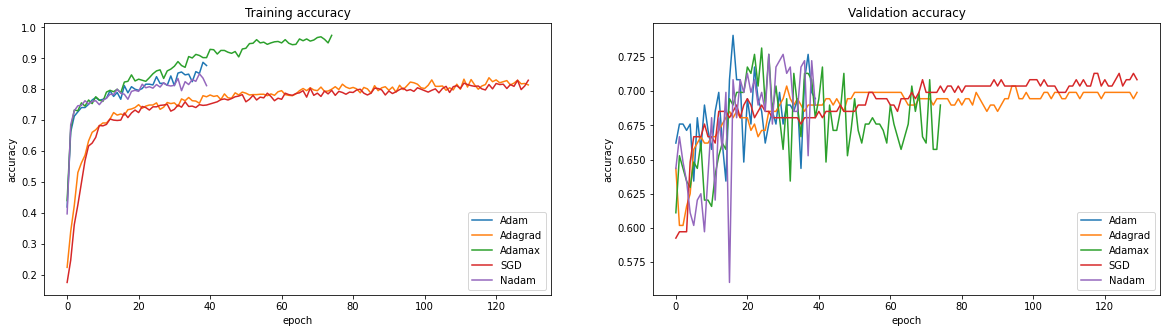

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(his1.history['accuracy'])
axes[0].plot(his2.history['accuracy'])
axes[0].plot(his3.history['accuracy'])
axes[0].plot(his4.history['accuracy'])
axes[0].plot(his5.history['accuracy'])

axes[0].set_title('Training accuracy')
axes[0].set_ylabel('accuracy')
axes[0].set_xlabel('epoch')
axes[0].legend(['Adam', 'Adagrad', 'Adamax', 'SGD', 'Nadam'])

# Validation 
axes[1].plot(his1.history['val_accuracy'])
axes[1].plot(his2.history['val_accuracy'])
axes[1].plot(his3.history['val_accuracy'])
axes[1].plot(his4.history['val_accuracy'])
axes[1].plot(his5.history['val_accuracy'])

plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Adam', 'Adagrad', 'Adamax', 'SGD', 'Nadam'])
plt.show()

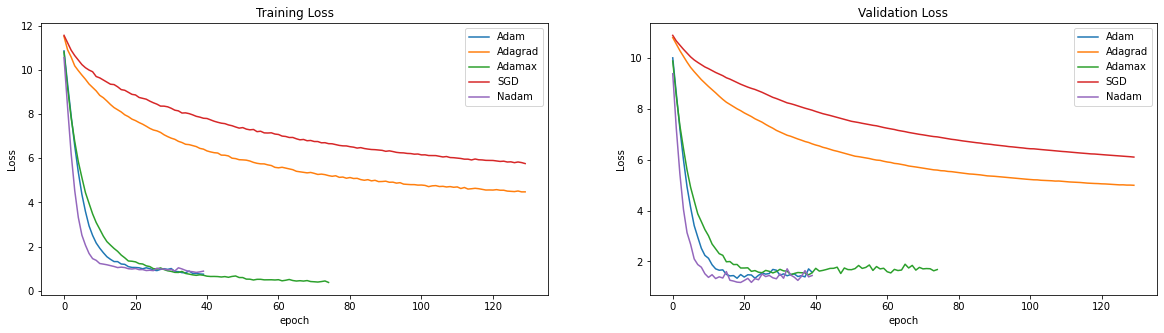

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(his1.history['loss'])
axes[0].plot(his2.history['loss'])
axes[0].plot(his3.history['loss'])
axes[0].plot(his4.history['loss'])
axes[0].plot(his5.history['loss'])

axes[0].set_title('Training Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('epoch')
axes[0].legend(['Adam', 'Adagrad', 'Adamax', 'SGD', 'Nadam'], loc=1)

# Validation 
axes[1].plot(his1.history['val_loss'])
axes[1].plot(his2.history['val_loss'])
axes[1].plot(his3.history['val_loss'])
axes[1].plot(his4.history['val_loss'])
axes[1].plot(his5.history['val_loss'])

plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Adam', 'Adagrad', 'Adamax', 'SGD', 'Nadam'], loc=1)
plt.show()

In [ ]:
model1.save('/content/drive/MyDrive/Colab Notebooks/m1')
model1.save('/content/drive/MyDrive/Colab Notebooks/m1.h5')

model2.save('/content/drive/MyDrive/Colab Notebooks/m2')
model2.save('/content/drive/MyDrive/Colab Notebooks/m2.h5')

model3.save('/content/drive/MyDrive/Colab Notebooks/m3')
model3.save('/content/drive/MyDrive/Colab Notebooks/m3.h5')

model4.save('/content/drive/MyDrive/Colab Notebooks/m4')
model4.save('/content/drive/MyDrive/Colab Notebooks/m4.h5')

model5.save('/content/drive/MyDrive/Colab Notebooks/m5')
model5.save('/content/drive/MyDrive/Colab Notebooks/m5.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/m1/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/m2/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/m3/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/m4/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/m5/assets


Let's plot the confusion matrix for the model that gave the best results (Adam optimizers)

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/SoP/Saved Models/m1')

In [ ]:
yhat_classes = model.predict_classes(x_test, verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
yhat_classes

array([4, 5, 5, 0, 4, 5, 5, 1, 5, 0, 0, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 0,
       5, 0, 5, 5, 1, 5, 1, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5,
       5, 5, 5, 5, 5, 5, 0, 5, 5, 4, 5, 5, 0, 5, 5, 5, 0, 1, 0, 5, 1, 5,
       0, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 0, 5, 5,
       5, 4, 5, 5, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 0, 0, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 5, 5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 5, 4, 5, 5,
       1, 5, 5, 0, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 4, 5, 5, 5, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, yhat_classes, normalize='true')
print(matrix)

[[0.8        0.         0.         0.         0.         0.2       ]
 [0.         0.33333333 0.         0.         0.         0.66666667]
 [0.         0.5        0.         0.         0.         0.5       ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.         0.42857143 0.57142857]
 [0.01769912 0.00884956 0.         0.         0.         0.97345133]]


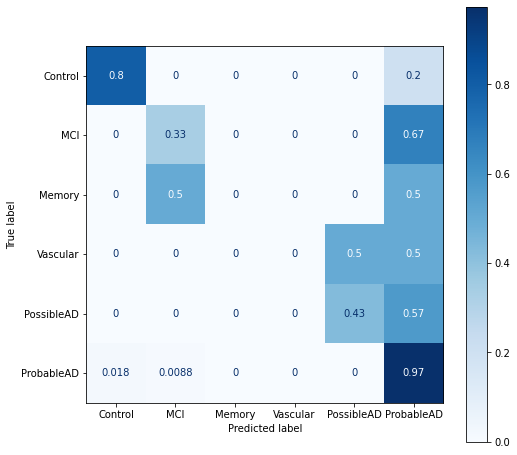

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

display_labels = ['Control','MCI','Memory','Vascular','PossibleAD','ProbableAD']
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=display_labels)

fig, ax = plt.subplots(figsize=(8, 8))

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal')
plt.show()

Apart from displaying this confusion matrix, could also display **classification_report**, which basically gives the precision, recall, f1-score
, etc. from the confusion matrix generated above. **classification_report** is present within `sklearn.metrics`.